In [1]:
# This example is to demonstrate how to use the existing code for real data.  The data to be used
# is in the 'example_data.csv' file, which is 200 samples generated from the two-state toy model
# from "Improved information criteria for Bayesian model averaging in lattice field theory"
# (http://arxiv.org/abs/2208.14983).  For applications that deviate from the toy problem in
# (e.g., different model spaces, more complicated fit functions), modifications to the
# 'improved_model_averaging' folder (e.g., to the functions in 'test_tmin.py') will need to be
# made.

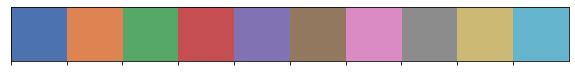

In [2]:
%matplotlib inline

import lsqfit
from improved_model_averaging import *
from improved_model_averaging.test_tmin import test_vary_tmin_SE

from improved_model_averaging.stats import model_avg

In [3]:
# Read in data

yraw = np.loadtxt('example_data.csv', delimiter=',')
# yraw is an Nsamples-by-Nt array that is necessary to compute the PPIC
y = gv.dataset.avg_data(yraw)
# y is an array of length Nt of average data used for fitting and computing all the ICs
Nsamples = yraw.shape[0]
Nt = yraw.shape[1]
t = np.arange(Nt)

test_data = {'t': t,
             'y': y,
             'yraw': yraw,
             'ND': Nsamples,
            }

In [4]:
tmax = test_data['t'][-1]
max_tmin = tmax - 4
Nt = 32
obs_name='E0'

IC_list = ['BAIC', 'BPIC', 'PPIC']
test_res = test_vary_tmin_SE(test_data, Nt=Nt, tmax=tmax, max_tmin=max_tmin, obs_name=obs_name,
                             priors_SE={"A0": gv.gvar("0(10)"),"E0": gv.gvar("1(1)")}, full_BC=False,
                             IC_list=IC_list, data_snr_min=0.0)


for IC in IC_list:
    print(IC + f": E_0 = {test_res['obs_avg_IC'][IC]}")

BAIC: E_0 = 0.807(98)
BPIC: E_0 = 0.807(98)
PPIC: E_0 = 0.824(38)


/home/jsitison/model_averaging/alternative-ICs/improved_model_averaging/plotting.py:220: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(test_res[x_coordn], p_norm[IC] / p_norm[IC_list[0]], color=IC_color[IC], linestyle=IC_linestyle[IC], label='pr$(M|D)$ ('+IC+')/pr$(M|D)$ ('+IC_list[0]+')')
/home/jsitison/model_averaging/alternative-ICs/improved_model_averaging/plotting.py:220: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(test_res[x_coordn], p_norm[IC] / p_norm[IC_list[0]], color=IC_color[IC], linestyle=IC_linestyle[IC], label='pr$(M|D)$ ('+IC+')/pr$(M|D)$ ('+IC_list[0]+')')


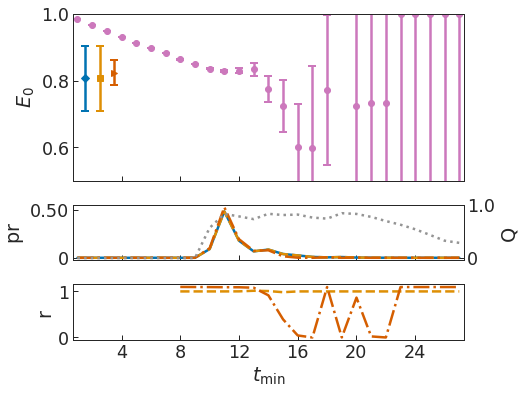

In [5]:
plot_MA_result(test_res, IC_list=IC_list, is_linear=False, target_value=None,
               show_IC_ratios=True, indv_plot_key='indv', ylim=[0.5,1.0])